11.228965282440186


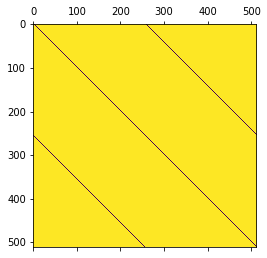

In [7]:
## two ways to get correctted masks
#1
import torch
import time
import numpy as np
import matplotlib.pyplot as plt
num_o = 256

t0 = time.time()
for _ in range(10000):
    diag = np.eye(2 * num_o)
    l1 = np.eye((2 * num_o), 2 *
                num_o, k=-num_o)
    l2 = np.eye((2 * num_o), 2 *
                num_o, k=num_o)
    mask = torch.from_numpy((diag + l1 + l2))
    mask = (1 - mask).type(torch.bool)
t1 = time.time()
plt.matshow(mask)
print(t1-t0)


1.2185852527618408


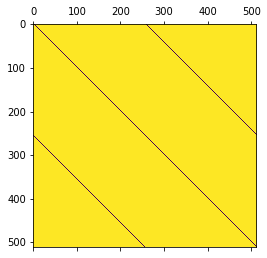

In [8]:
t0 = time.time()
for _ in range(10000):
    labels = torch.cat([torch.arange(num_o)
                    for i in range(2)], dim=0)
    labels = ~(labels.unsqueeze(0) == labels.unsqueeze(1))
    
t1 = time.time()
plt.matshow(labels)
print(t1-t0)
#结论，使用第二种方法计算mask速度要快10倍

0.7290365695953369


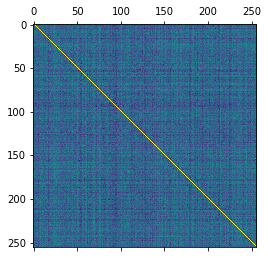

In [17]:
## cossine v.s. normalized dotproduct
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import time

a = torch.rand(256,128,device="cuda:6")
t0 = time.time()
for _ in range(10000):
    a = F.normalize(a, dim=1)
    similarity_matrix = torch.matmul(a, a.T)
t1 = time.time()
print(t1-t0)
plt.matshow(similarity_matrix.cpu())


1.2175662517547607


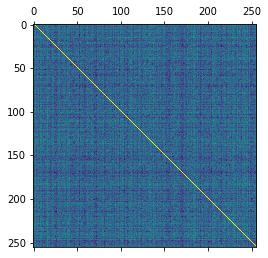

In [20]:
a = torch.rand(256, 128,device="cuda:6")
# cos = torch.nn.CosineSimilarity(dim=-1)
t0 = time.time()
for _ in range(10000):

    similarity_matrix = F.cosine_similarity(a.unsqueeze(1), a.unsqueeze(0),dim=-1)
t1 = time.time()
print(t1-t0)
plt.matshow(similarity_matrix.cpu())
## 结论：计算二维矩阵的相似度矩阵，使用cossimilarity要慢20倍(cpu),但是cuda则相差不大（1.2vs0.73）